# 📊 Analytics - Camada RAW (Bronze)

## análise exploratória de dados - Dados de Aviação (1948-10-24 - 2022-12-29)

** Objetivo **: Explorar os dados brutos de relativos aos acidentes de avião e gerar Dashboards que possibilitem a compreensão destes eventos.

## 📋 Índice

1. Bibliotecas utilizadas;
2. Carregamento dos Dados;
3. Visão Geral dos Dados;
4. Análise de Qualidade;
5. Análise Temporal;
6. Análise de Serveridade;
7. Análise Geográfica;
8. Análise de Aeronaves;
9. Análise de Fases de Voo;
10. Conclusões.


# Importação de Bibliotecas 
## Bibliotecas que serão usadas na análise dos dados de acidentes aéreos;

- O Pandas será utilizado para manipular dados em tabelas;
- O Numpy será utilizado para operações matemáticas;
- O Matplotlib e o Seaborn serão utilizado para criação de gráficos;

In [15]:
import pandas as pd

pd.set_option('display.max_rows', 100)      # Mostra até 100 linhas quando você imprime um DataFrame.
pd.set_option('display.max_columns', None)  # Mostra todas as colunas (não corta nenhuma).
pd.set_option('display.width', None)        # Ajusta automaticamente a largura da saída no terminal/notebook.
pd.set_option('display.precision', 2)       # Mostra números decimais com 2 casas decimais.


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings

warnings.filterwarnings('ignore') # Ignora Warnings
sns.set_style('whitegrid') # Define o estilo padrão do seaborn como 'whitegrid'
plt.rcParams['figure.figsize'] = (12, 6) # padroniza as figuras em 12x6

print("Êxito na importação das Bibliotecas!")

Êxito na importação das Bibliotecas!


# CARREGAR DADOS
Nesta etapa os dados brutos no csv serão carregados como um dataframe para facilitar a manipulação.

In [16]:
df_raw = pd.read_csv('dados_brutos.csv', encoding = 'cp1252', low_memory=False) # cp1252 = tabela de simbolos do windows, low_memory=False para processar tipos de dados só no final

print(f"Dados carregados com sucesso!")
print(f"Total de registros: {len(df_raw):,}")
print(f"Total de colunas: {len(df_raw.columns)}")
print(f"Tamanho em memória: {df_raw.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

Dados carregados com sucesso!
Total de registros: 88,889
Total de colunas: 31
Tamanho em memória: 122.12 MB


In [18]:
df_raw.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [20]:
df_raw.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,NaN,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


# Estatísticas Descritivas

Identificar as estatísticas básicas(média, mediana, mín, max) de colunas numérias:
top - moda
freq - quantidade de vezes que moda aparece
count - quantidade de valores não nulos
mean - média
std - desvio padrão
min - valor mínimo
25%, 50%, 75% - quartis
max - valor máximo

In [ ]:
df_raw.describe(include = 'all').T # transposta da estatísticas descritivas

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
count,88889,88889,88889,88889,88837,88663,34382,34373,50132,52704,87889,85695,32287,87507,88826,88797,88787,82805.00,81793,32023,12582,82697,16648,77488.00,76379.00,76956.00,82977.00,84397,61724,82505,75118
unique,87951,2,88863,14782,27758,219,25589,27154,10374,24870,109,4,15,79104,8237,12318,2,NaN,12,31,3,26,13590,NaN,NaN,NaN,NaN,4,12,17074,2924
top,20001214X45071,Accident,ERA22LA103,1982-05-16,"ANCHORAGE, AK",United States,332739N,0112457W,NONE,Private,Non-Fatal,Substantial,Airplane,NONE,Cessna,152,No,NaN,Reciprocating,091,NSCH,Personal,Pilot,NaN,NaN,NaN,NaN,VMC,Landing,Probable Cause,25-09-2020
freq,3,85015,2,25,434,82248,19,24,1488,240,67357,64148,27617,344,22227,2367,80312,NaN,69530,18221,4474,49448,258,NaN,NaN,NaN,NaN,77303,15428,61754,17019
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.15,NaN,NaN,NaN,NaN,NaN,0.65,0.28,0.36,5.33,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.45,NaN,NaN,NaN,NaN,NaN,5.49,1.54,2.24,27.91,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,1.00,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,2.00,NaN,NaN,NaN,NaN


# ANÁLISE DE QUALIDADE

Análise de Valores Nulos
Objetivo: Identificar campos com dados faltantes e avaliar impacto na análise


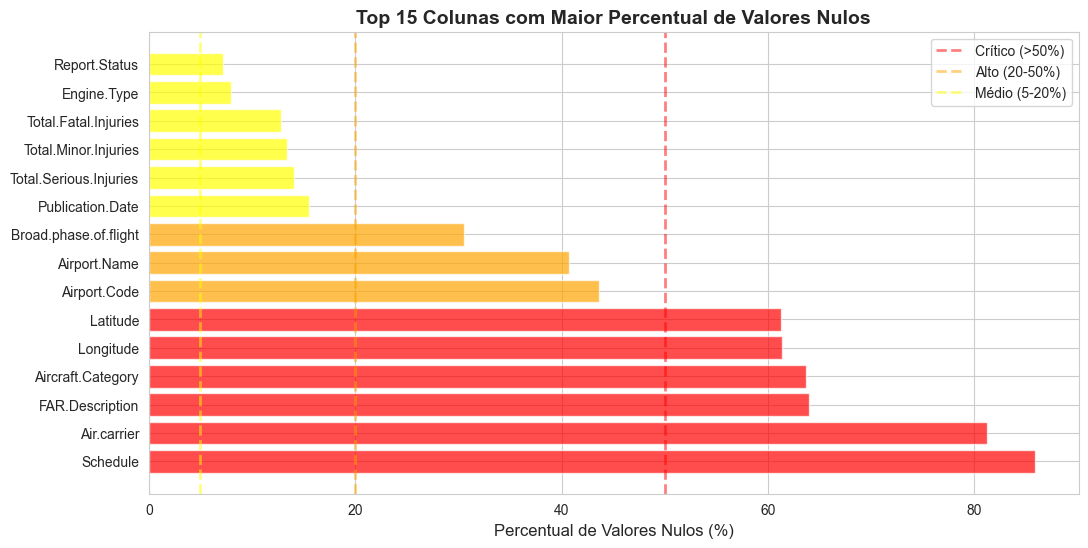

In [88]:
# Calcular estatísticas de valores nulos
missing_data = pd.DataFrame({
    'Coluna': df_raw.columns,
    'Qtd_Nulos': df_raw.isnull().sum().values,
    'Perc_Nulos': (df_raw.isnull().sum().values / len(df_raw) * 100).round(2)
})

# Ordenar por percentual de nulos
missing_data = missing_data.sort_values('Perc_Nulos', ascending=False)

# Exibir apenas colunas com valores nulos

colunas_com_nulos = missing_data[missing_data['Qtd_Nulos'] > 0]

# Resumo geral
total_cells = len(df_raw) * len(df_raw.columns)
total_nulls = df_raw.isnull().sum().sum()
completude_geral = ((total_cells - total_nulls) / total_cells * 100)

top_missing = colunas_com_nulos.head(15)
colors = ['red' if x > 50 else 'orange' if x > 20 else 'yellow' if x > 5 else 'lightgreen' 
          for x in top_missing['Perc_Nulos']]

plt.title('Top 15 Colunas com Maior Percentual de Valores Nulos', 
          fontsize=14, fontweight='bold')
plt.xlabel('Percentual de Valores Nulos (%)', fontsize=12)
plt.barh(top_missing['Coluna'], top_missing['Perc_Nulos'], color=colors, alpha=0.7)
plt.axvline(x=50, color='red', linestyle='--', linewidth=2, alpha=0.5, label='Crítico (>50%)')
plt.axvline(x=20, color='orange', linestyle='--', linewidth=2, alpha=0.5, label='Alto (20-50%)')
plt.axvline(x=5, color='yellow', linestyle='--', linewidth=2, alpha=0.5, label='Médio (5-20%)')
plt.legend()


plt.show()

# Análise Temporal

Análise de Distribuição Temporal dos Eventos
Objetivo: Entender a distribuição dos eventos ao longo do tempo

obs: Conversão temporária de Event.Date ('object') para datetime, apenas para análise - dados RAW não são modificados

Text(0, 0.5, 'Número de Eventos')

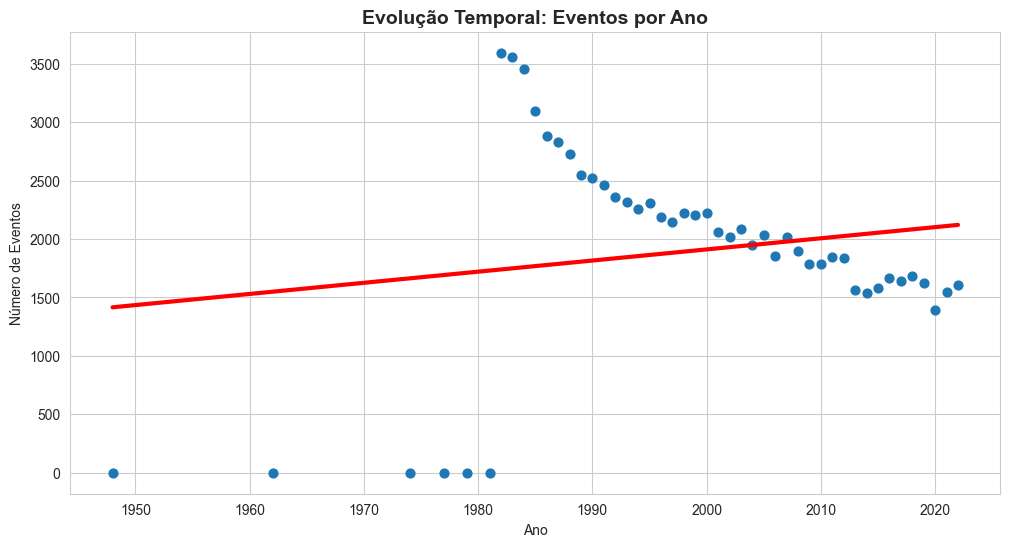

In [ ]:
# Converte object para datetime 
temp_date = pd.to_datetime(df_raw['Event.Date'], errors='coerce')

# Extrair componentes temporais 
temp_year = temp_date.dt.year
temp_month = temp_date.dt.month
temp_decade = (temp_year // 10) * 10

events_by_year = temp_year.value_counts().sort_index()



# Reta de regressão 
x = events_by_year.index.values      # anos
y = events_by_year.values            # número de eventos
a, b = np.polyfit(events_by_year.index, events_by_year.values, 1)   # y = a*x + b
y_reta = a * x + b
plt.plot(
    x,
    y_reta,
    linewidth=3,
    label='Regressão Linear',
    color='red'
)

# Gráfico de dispersão
plt.scatter(
    events_by_year.index,
    events_by_year,          
    marker='o',              
    s=40,                   
    alpha=1
)
plt.title('Evolução Temporal: Eventos por Ano', fontsize=14, fontweight='bold')
plt.xlabel('Ano')
plt.ylabel('Número de Eventos')


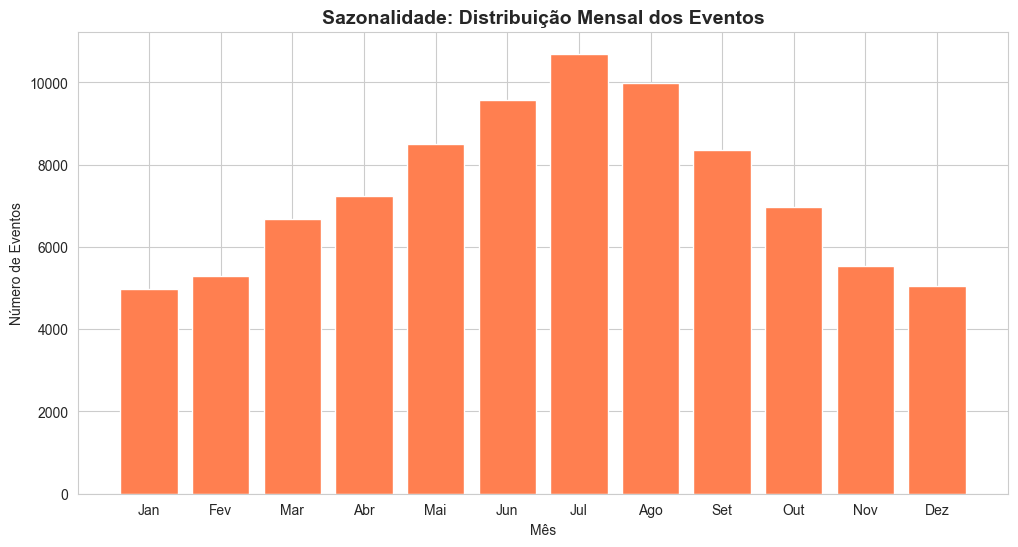

In [57]:
# Gráfico 2: Distribuição mensal (sazonalidade)
month_dist = temp_month.value_counts().sort_index()
month_names = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 
               'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']

plt.bar(month_names, month_dist.values, color='coral')
plt.title('Sazonalidade: Distribuição Mensal dos Eventos', 
                  fontsize=14, fontweight='bold')
plt.xlabel('Mês')
plt.ylabel('Número de Eventos')
plt.show()



# ANÁLISE DE SEVERIDADE
Objetivo: Entender a gravidade dos acidentes e incidentes

   • Total.Fatal.Injuries: 50,201
   • Total.Serious.Injuries: 21,377
   • Total.Minor.Injuries: 27,478
   • Total.Uninjured: 441,889


Text(0.5, 1.0, 'Distribuição por Severidade de Lesões')

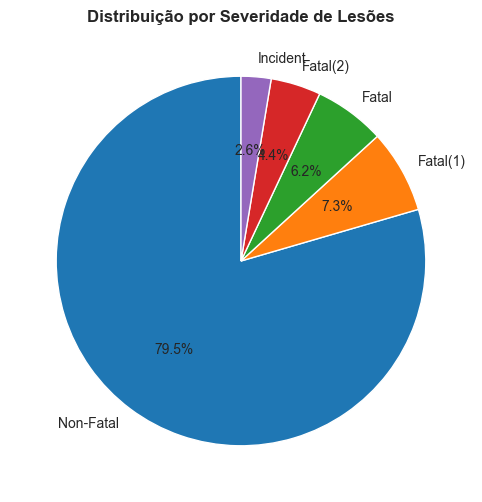

In [93]:

# Estatísticas de severidade dos eventos
severity_dist = df_raw['Injury.Severity'].value_counts()

# Danos à aeronave
damage_dist = df_raw['Aircraft.damage'].value_counts()

# Estatísticas de vítimas
injury_cols = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 
               'Total.Minor.Injuries', 'Total.Uninjured']

for col in injury_cols:
    total = df_raw[col].sum()
    print(f"   • {col}: {total:,.0f}")

# Visualizações

# Gráfico 1: Severidade de lesões
plt.pie(severity_dist.head(5).values, labels=severity_dist.head(5).index, 
               autopct='%1.1f%%', startangle=90)
plt.title('Distribuição por Severidade de Lesões', fontweight='bold')

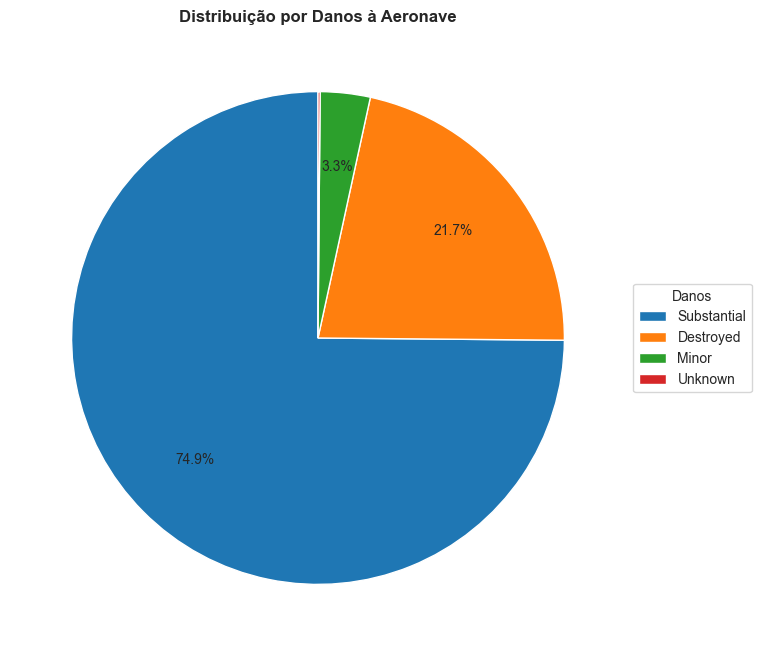

In [112]:
plt.figure(figsize=(8, 8))

wedges, texts, autotexts = plt.pie(
    damage_dist.head(5).values,
    autopct=lambda pct: f'{pct:.1f}%' if pct >= 3 else '',
    startangle=90,
    pctdistance=0.7
)

plt.legend(
    wedges,
    damage_dist.head(5).index,
    title='Danos',
    loc='center left',
    bbox_to_anchor=(1, 0.5)
)

plt.title('Distribuição por Danos à Aeronave', fontweight='bold')
plt.show()




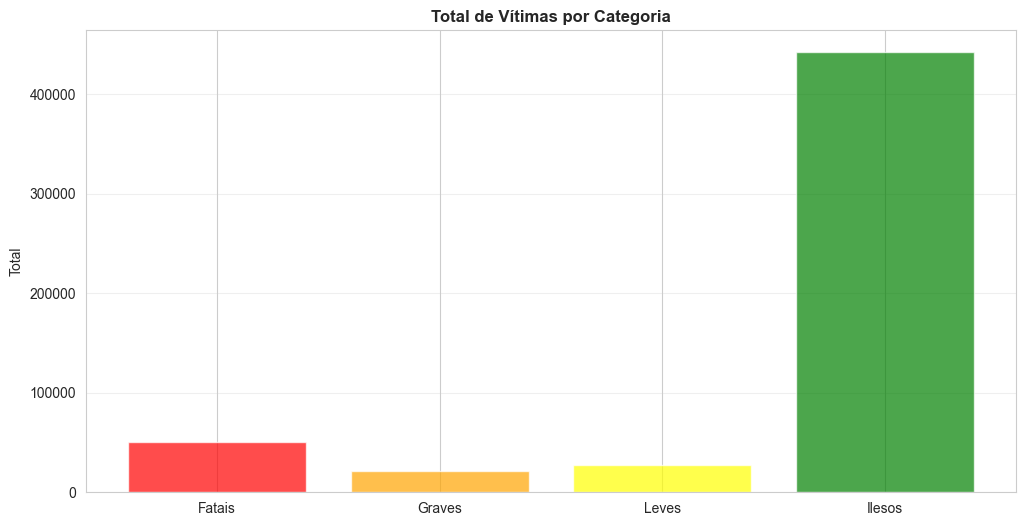

In [97]:

# Gráfico 3: Total de vítimas por categoria
injuries_summary = pd.DataFrame({
    'Categoria': ['Fatais', 'Graves', 'Leves', 'Ilesos'],
    'Total': [
        df_raw['Total.Fatal.Injuries'].sum(),
        df_raw['Total.Serious.Injuries'].sum(),
        df_raw['Total.Minor.Injuries'].sum(),
        df_raw['Total.Uninjured'].sum()
    ]
})
plt.bar(injuries_summary['Categoria'], injuries_summary['Total'], 
               color=['red', 'orange', 'yellow', 'green'], alpha=0.7)
plt.title('Total de Vítimas por Categoria', fontweight='bold')
plt.ylabel('Total')
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True, alpha=0.3, axis='y')


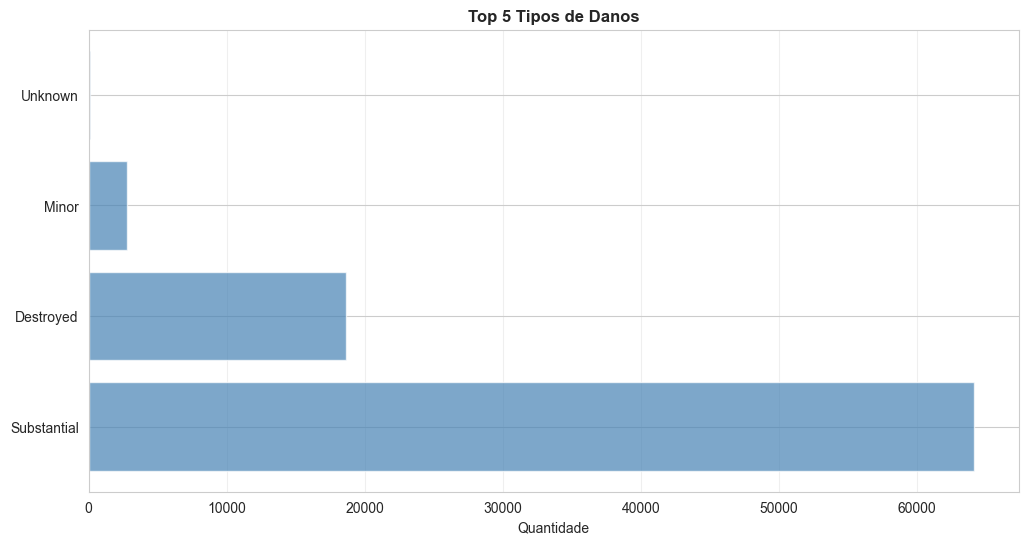

In [113]:

# Gráfico 4: Danos à aeronave (barras)
plt.barh(damage_dist.head(5).index, damage_dist.head(5).values, 
                color='steelblue', alpha=0.7)
plt.title('Top 5 Tipos de Danos', fontweight='bold')
plt.xlabel('Quantidade')
plt.grid(True, alpha=0.3, axis='x')

plt.show()


# ========================================
# ANÁLISE GEOGRÁFICA
# ========================================

# Análise da Distribuição Geográfica dos Eventos
## Objetivo: Entender onde os eventos ocorrem com mais frequência

🌍 ANÁLISE GEOGRÁFICA

🌎 Top 15 Países com Mais Eventos:

   United States                 : 82,248 eventos
   Brazil                        :    374 eventos
   Canada                        :    359 eventos
   Mexico                        :    358 eventos
   United Kingdom                :    344 eventos
   Australia                     :    300 eventos
   France                        :    236 eventos
   Spain                         :    226 eventos
   Bahamas                       :    216 eventos
   Germany                       :    215 eventos
   Colombia                      :    193 eventos
   South Africa                  :    129 eventos
   Japan                         :    126 eventos
   Venezuela                     :    121 eventos
   Italy                         :    114 eventos

📍 Análise de Coordenadas:
   • Eventos COM coordenadas: 34,367 (38.7%)
   • Eventos SEM coordenadas: 54,522 (61.3%)

🇺🇸 Top 10 Estados dos EUA com Mais Eventos:
   CA                          

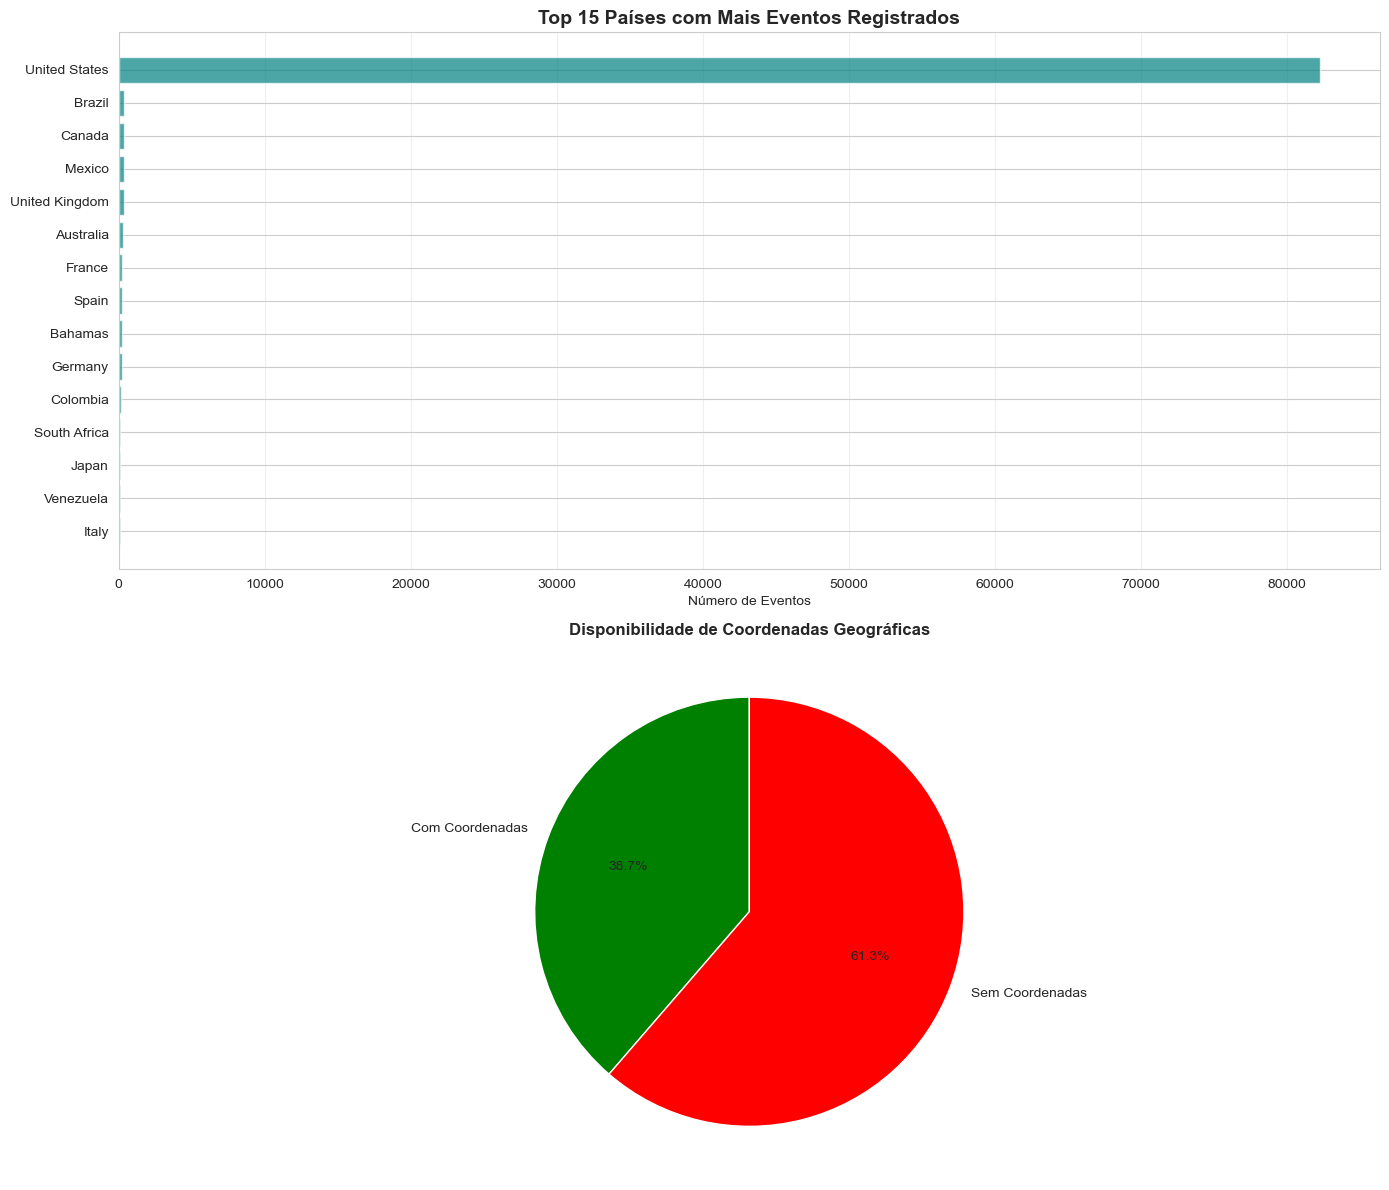


🔧 OBSERVAÇÕES PARA ETL:
   • ~61% dos eventos não têm coordenadas precisas
   • Location e Country têm boa completude (>99%)
   • Criar flag 'has_coordinates' para análises que exigem localização precisa

✅ Análise geográfica concluída!


In [ ]:


print("=" * 80)
print("🌍 ANÁLISE GEOGRÁFICA")
print("=" * 80)

# Distribuição por país
print("\n🌎 Top 15 Países com Mais Eventos:\n")
top_countries = df_raw['Country'].value_counts().head(15)
for country, count in top_countries.items():
    print(f"   {country:<30}: {count:>6,} eventos")

# Análise de coordenadas
has_coords = df_raw['Latitude'].notna() & df_raw['Longitude'].notna()
print(f"\n📍 Análise de Coordenadas:")
print(f"   • Eventos COM coordenadas: {has_coords.sum():,} ({has_coords.sum()/len(df_raw)*100:.1f}%)")
print(f"   • Eventos SEM coordenadas: {(~has_coords).sum():,} ({(~has_coords).sum()/len(df_raw)*100:.1f}%)")

# Estados mais afetados (para Estados Unidos)
if 'Location' in df_raw.columns:
    # Extrair estado de Location (formato: "CITY, STATE")
    us_events = df_raw[df_raw['Country'] == 'United States']
    print(f"\n🇺🇸 Top 10 Estados dos EUA com Mais Eventos:")
    
    # Extrair estado (assumindo formato "CITY, STATE")
    us_events_with_state = us_events[us_events['Location'].str.contains(',', na=False)]
    if len(us_events_with_state) > 0:
        states = us_events_with_state['Location'].str.split(',').str[-1].str.strip()
        top_states = states.value_counts().head(10)
        for state, count in top_states.items():
            print(f"   {state:<30}: {count:>5,} eventos")

# Visualizações
print("\n📊 Gerando visualizações geográficas...\n")

fig, axes = plt.subplots(2, 1, figsize=(14, 12))

# Gráfico 1: Top 15 países
axes[0].barh(range(len(top_countries)), top_countries.values, color='teal', alpha=0.7)
axes[0].set_yticks(range(len(top_countries)))
axes[0].set_yticklabels(top_countries.index)
axes[0].set_xlabel('Número de Eventos')
axes[0].set_title('Top 15 Países com Mais Eventos Registrados', 
                  fontsize=14, fontweight='bold')
axes[0].invert_yaxis()
axes[0].grid(True, alpha=0.3, axis='x')

# Gráfico 2: Disponibilidade de coordenadas
coord_data = pd.DataFrame({
    'Categoria': ['Com Coordenadas', 'Sem Coordenadas'],
    'Quantidade': [has_coords.sum(), (~has_coords).sum()]
})
axes[1].pie(coord_data['Quantidade'], labels=coord_data['Categoria'], 
            autopct='%1.1f%%', startangle=90, colors=['green', 'red'])
axes[1].set_title('Disponibilidade de Coordenadas Geográficas', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n🔧 OBSERVAÇÕES PARA ETL:")
print("   • ~61% dos eventos não têm coordenadas precisas")
print("   • Location e Country têm boa completude (>99%)")
print("   • Criar flag 'has_coordinates' para análises que exigem localização precisa")

print("\n✅ Análise geográfica concluída!")

✈️ ANÁLISE DE AERONAVES

🏭 Top 15 Fabricantes com Mais Eventos:

   Cessna                        : 22,227 eventos
   Piper                         : 12,029 eventos
   CESSNA                        :  4,922 eventos
   Beech                         :  4,330 eventos
   PIPER                         :  2,841 eventos
   Bell                          :  2,134 eventos
   Boeing                        :  1,594 eventos
   BOEING                        :  1,151 eventos
   Grumman                       :  1,094 eventos
   Mooney                        :  1,092 eventos
   BEECH                         :  1,042 eventos
   Robinson                      :    946 eventos
   Bellanca                      :    886 eventos
   Hughes                        :    795 eventos
   Schweizer                     :    629 eventos

🛩️ Top 10 Modelos com Mais Eventos:

   152                           :  2,367 eventos
   172                           :  1,756 eventos
   172N                          :  1,164 event

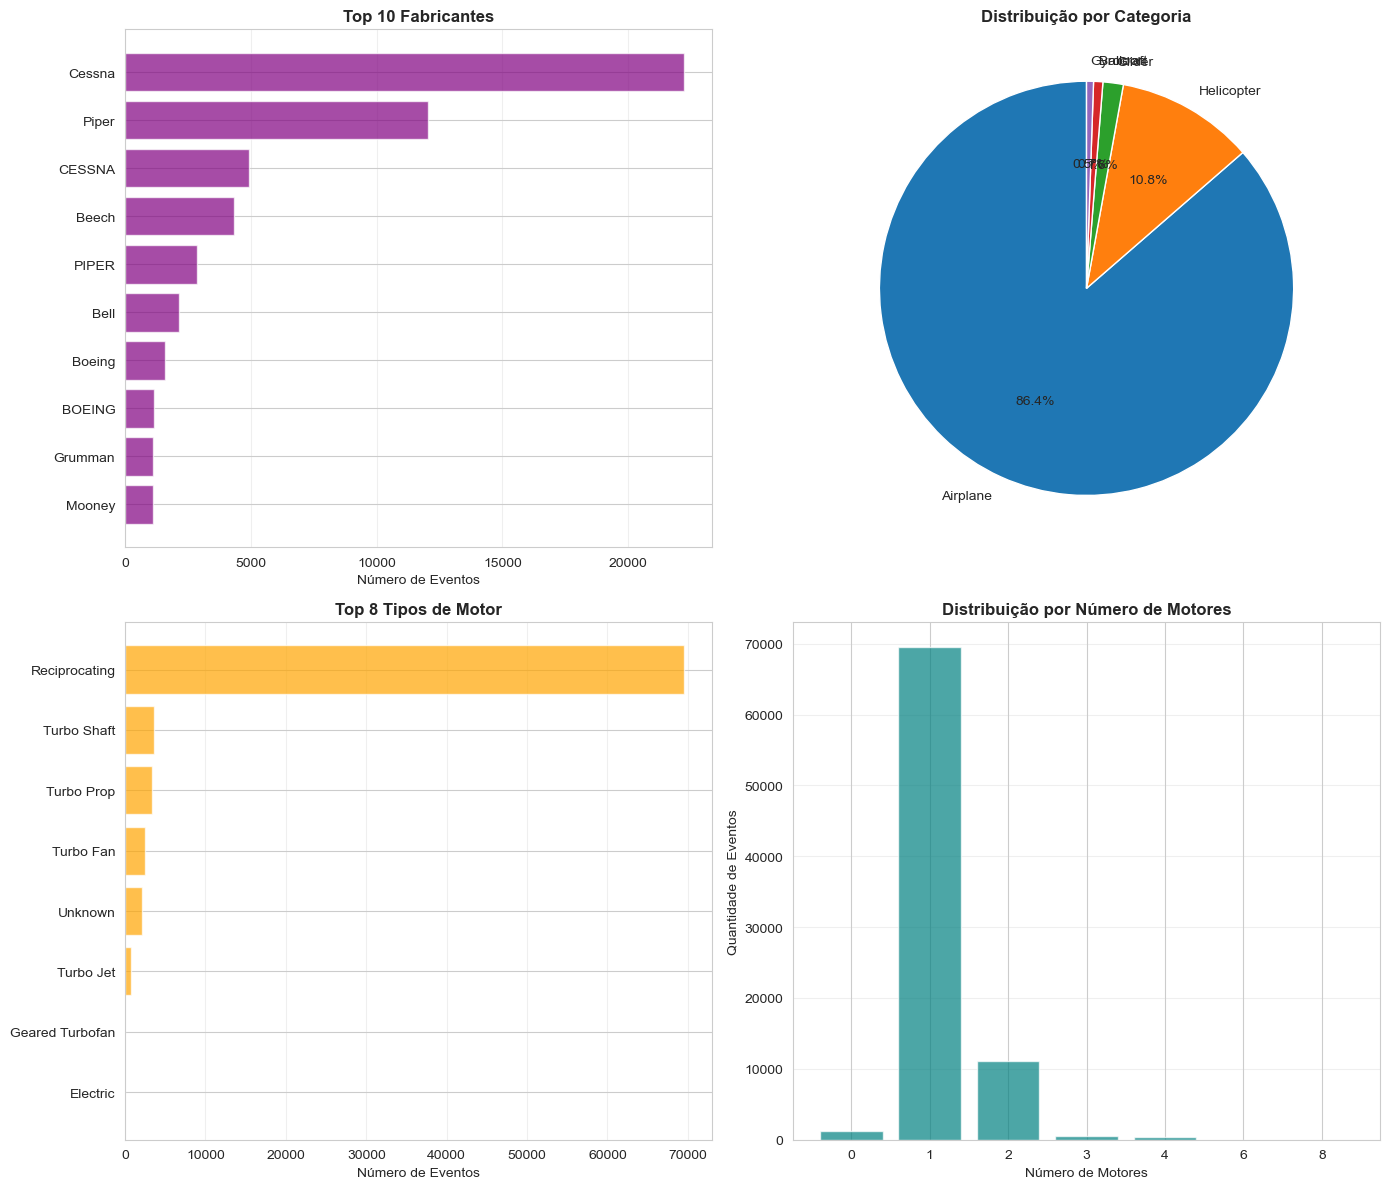


✅ Análise de aeronaves concluída!


In [71]:
# ========================================
# ANÁLISE DE AERONAVES
# ========================================

# Análise das Características das Aeronaves Envolvidas
## Objetivo: Entender perfil das aeronaves nos eventos

print("=" * 80)
print("✈️ ANÁLISE DE AERONAVES")
print("=" * 80)

# Top fabricantes
print("\n🏭 Top 15 Fabricantes com Mais Eventos:\n")
top_makes = df_raw['Make'].value_counts().head(15)
for make, count in top_makes.items():
    print(f"   {make:<30}: {count:>6,} eventos")

# Top modelos
print("\n🛩️ Top 10 Modelos com Mais Eventos:\n")
top_models = df_raw['Model'].value_counts().head(10)
for model, count in top_models.items():
    print(f"   {model:<30}: {count:>6,} eventos")

# Categoria de aeronave
print("\n📋 Distribuição por Categoria de Aeronave:")
category_dist = df_raw['Aircraft.Category'].value_counts()
for category, count in category_dist.items():
    print(f"   {category:<30}: {count:>6,} eventos")

# Tipo de motor
print("\n⚙️ Distribuição por Tipo de Motor:")
engine_dist = df_raw['Engine.Type'].value_counts().head(10)
for engine, count in engine_dist.items():
    print(f"   {engine:<30}: {count:>6,} eventos")

# Número de motores
print("\n🔢 Distribuição por Número de Motores:")
num_engines = df_raw['Number.of.Engines'].value_counts().sort_index()
for num, count in num_engines.items():
    if not pd.isna(num):
        print(f"   {int(num)} motor(es): {count:>6,} eventos")

# Aeronaves amadoras
amateur_dist = df_raw['Amateur.Built'].value_counts()
print(f"\n🔨 Aeronaves Construídas por Amadores:")
print(f"   • Sim: {amateur_dist.get('Yes', 0):,} eventos")
print(f"   • Não: {amateur_dist.get('No', 0):,} eventos")

# Visualizações
print("\n📊 Gerando visualizações de aeronaves...\n")

fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Gráfico 1: Top 10 fabricantes
axes[0, 0].barh(range(10), top_makes.head(10).values, color='purple', alpha=0.7)
axes[0, 0].set_yticks(range(10))
axes[0, 0].set_yticklabels(top_makes.head(10).index)
axes[0, 0].set_xlabel('Número de Eventos')
axes[0, 0].set_title('Top 10 Fabricantes', fontweight='bold')
axes[0, 0].invert_yaxis()
axes[0, 0].grid(True, alpha=0.3, axis='x')

# Gráfico 2: Categoria de aeronave
axes[0, 1].pie(category_dist.head(5).values, labels=category_dist.head(5).index, 
               autopct='%1.1f%%', startangle=90)
axes[0, 1].set_title('Distribuição por Categoria', fontweight='bold')

# Gráfico 3: Tipo de motor
axes[1, 0].barh(range(len(engine_dist.head(8))), engine_dist.head(8).values, 
                color='orange', alpha=0.7)
axes[1, 0].set_yticks(range(len(engine_dist.head(8))))
axes[1, 0].set_yticklabels(engine_dist.head(8).index)
axes[1, 0].set_xlabel('Número de Eventos')
axes[1, 0].set_title('Top 8 Tipos de Motor', fontweight='bold')
axes[1, 0].invert_yaxis()
axes[1, 0].grid(True, alpha=0.3, axis='x')

# Gráfico 4: Número de motores
valid_engines = num_engines.dropna()
axes[1, 1].bar([str(int(x)) for x in valid_engines.index], valid_engines.values, 
               color='teal', alpha=0.7)
axes[1, 1].set_xlabel('Número de Motores')
axes[1, 1].set_ylabel('Quantidade de Eventos')
axes[1, 1].set_title('Distribuição por Número de Motores', fontweight='bold')
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\n✅ Análise de aeronaves concluída!")

🛫 ANÁLISE DE FASES DE VOO

📊 Top 15 Fases de Voo com Mais Eventos:

   Landing                  : 15,428 eventos
   Takeoff                  : 12,493 eventos
   Cruise                   : 10,269 eventos
   Maneuvering              :  8,144 eventos
   Approach                 :  6,546 eventos
   Climb                    :  2,034 eventos
   Taxi                     :  1,958 eventos
   Descent                  :  1,887 eventos
   Go-around                :  1,353 eventos
   Standing                 :    945 eventos
   Unknown                  :    548 eventos
   Other                    :    119 eventos

🎯 Distribuição por Propósito do Voo:

   Personal                 : 49,448 eventos
   Instructional            : 10,601 eventos
   Unknown                  :  6,802 eventos
   Aerial Application       :  4,712 eventos
   Business                 :  4,018 eventos
   Positioning              :  1,646 eventos
   Other Work Use           :  1,264 eventos
   Ferry                    :    812 e

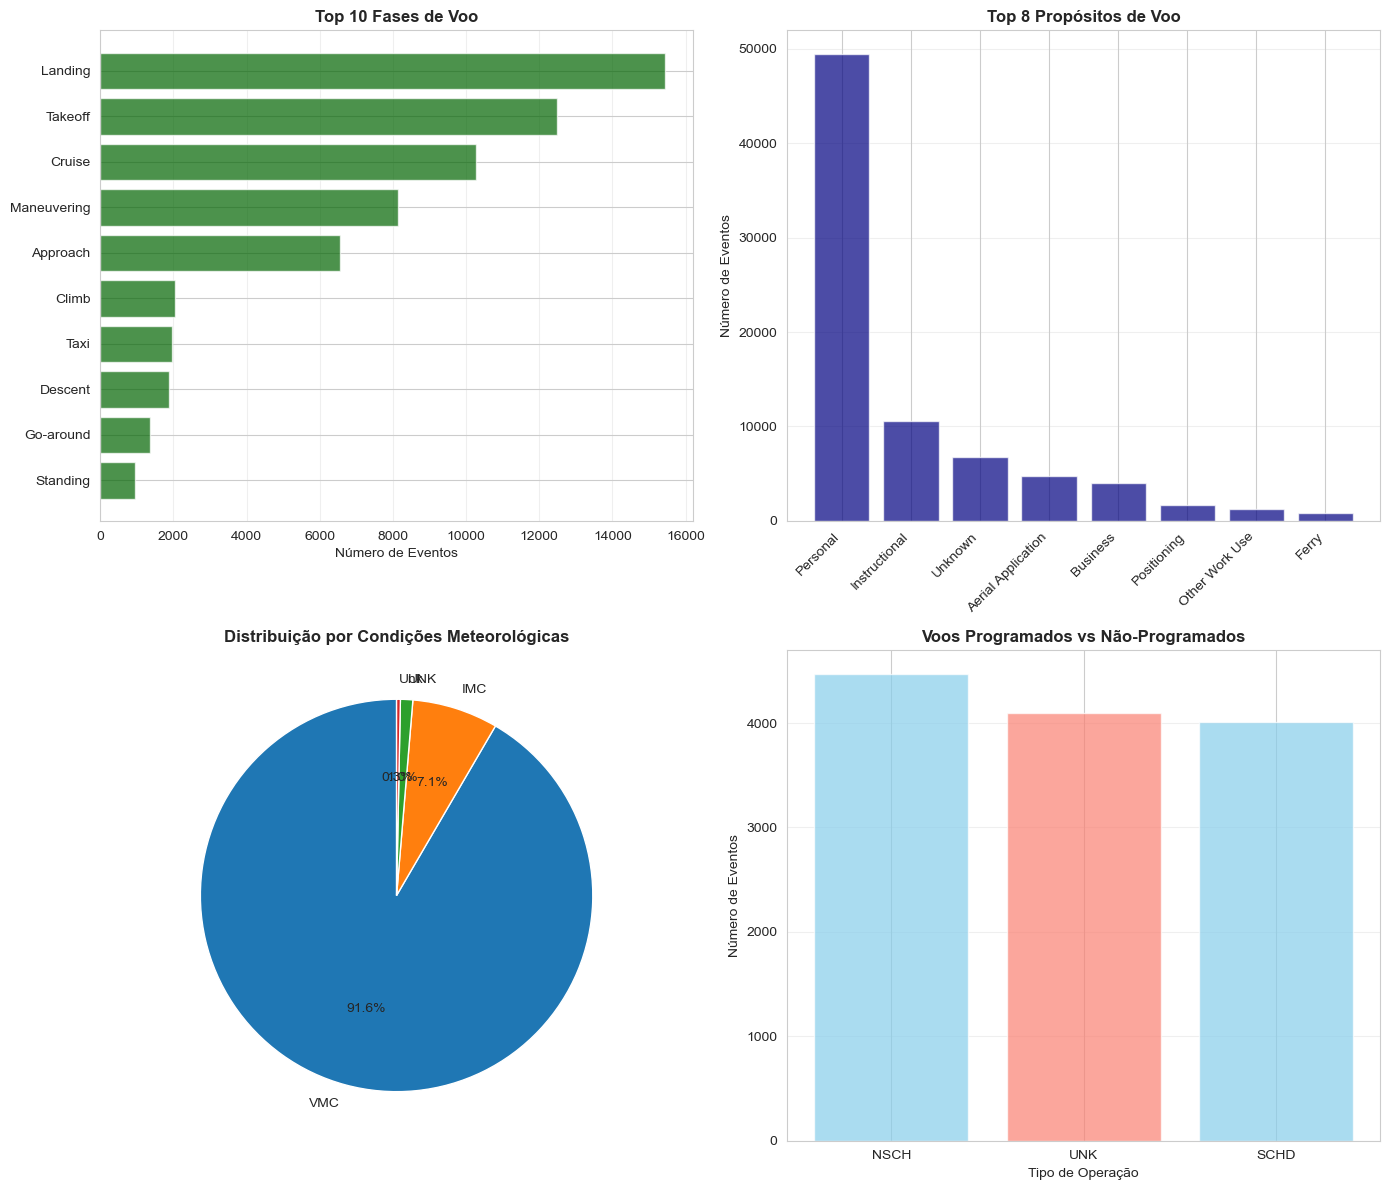


💡 INSIGHTS OPERACIONAIS:
   • Fase mais crítica: Landing
   • Propósito predominante: Personal
   • Maioria em condições: VMC

✅ Análise de fases de voo concluída!


In [72]:
# ========================================
# ANÁLISE DE FASES DE VOO
# ========================================

# Análise das Fases de Voo Durante os Eventos
## Objetivo: Identificar em que momento do voo os eventos ocorrem

print("=" * 80)
print("🛫 ANÁLISE DE FASES DE VOO")
print("=" * 80)

# Distribuição por fase de voo
print("\n📊 Top 15 Fases de Voo com Mais Eventos:\n")
phase_dist = df_raw['Broad.phase.of.flight'].value_counts().head(15)
for phase, count in phase_dist.items():
    print(f"   {phase:<25}: {count:>6,} eventos")

# Propósito do voo
print("\n🎯 Distribuição por Propósito do Voo:\n")
purpose_dist = df_raw['Purpose.of.flight'].value_counts().head(10)
for purpose, count in purpose_dist.items():
    print(f"   {purpose:<25}: {count:>6,} eventos")

# Condições meteorológicas
print("\n🌤️ Distribuição por Condições Meteorológicas:\n")
weather_dist = df_raw['Weather.Condition'].value_counts()
for weather, count in weather_dist.items():
    print(f"   {weather:<10}: {count:>6,} eventos ({count/len(df_raw)*100:.1f}%)")

# Visualizações
print("\n📊 Gerando visualizações de fases de voo...\n")

fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Gráfico 1: Fases de voo
axes[0, 0].barh(range(10), phase_dist.head(10).values, color='darkgreen', alpha=0.7)
axes[0, 0].set_yticks(range(10))
axes[0, 0].set_yticklabels(phase_dist.head(10).index)
axes[0, 0].set_xlabel('Número de Eventos')
axes[0, 0].set_title('Top 10 Fases de Voo', fontweight='bold')
axes[0, 0].invert_yaxis()
axes[0, 0].grid(True, alpha=0.3, axis='x')

# Gráfico 2: Propósito do voo
axes[0, 1].bar(range(len(purpose_dist.head(8))), purpose_dist.head(8).values, 
               color='navy', alpha=0.7)
axes[0, 1].set_xticks(range(len(purpose_dist.head(8))))
axes[0, 1].set_xticklabels(purpose_dist.head(8).index, rotation=45, ha='right')
axes[0, 1].set_ylabel('Número de Eventos')
axes[0, 1].set_title('Top 8 Propósitos de Voo', fontweight='bold')
axes[0, 1].grid(True, alpha=0.3, axis='y')

# Gráfico 3: Condições meteorológicas
axes[1, 0].pie(weather_dist.values, labels=weather_dist.index, 
               autopct='%1.1f%%', startangle=90)
axes[1, 0].set_title('Distribuição por Condições Meteorológicas', fontweight='bold')

# Gráfico 4: Tipo de operação (Schedule)
schedule_dist = df_raw['Schedule'].value_counts()
axes[1, 1].bar(schedule_dist.index, schedule_dist.values, 
               color=['skyblue', 'salmon'], alpha=0.7)
axes[1, 1].set_xlabel('Tipo de Operação')
axes[1, 1].set_ylabel('Número de Eventos')
axes[1, 1].set_title('Voos Programados vs Não-Programados', fontweight='bold')
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\n💡 INSIGHTS OPERACIONAIS:")
print(f"   • Fase mais crítica: {phase_dist.idxmax()}")
print(f"   • Propósito predominante: {purpose_dist.idxmax()}")
print(f"   • Maioria em condições: {weather_dist.idxmax()}")

print("\n✅ Análise de fases de voo concluída!")

In [ ]:
# ========================================
# CONCLUSÕES E PRÓXIMOS PASSOS
# ========================================

print("=" * 80)
print("📋 CONCLUSÕES DA ANÁLISE EXPLORATÓRIA")
print("=" * 80)

print("""
🎯 RESUMO EXECUTIVO:

1. VOLUME E ESTRUTURA DOS DADOS:
   ✅ Dataset com 88.889 registros de eventos aéreos
   ✅ 31 colunas com informações diversas
   ✅ Período histórico de várias décadas
   ✅ Tamanho: ~21 MB em memória

2. QUALIDADE DOS DADOS:
   ⚠️ Completude geral: ~70-80%
   🔴 Campos críticos com muitos nulos:
      • Aircraft.Category: ~64% nulos
      • Latitude/Longitude: ~61% nulos
      • Airport.Code/Name: ~40-44% nulos
   🟢 Campos essenciais bem preenchidos:
      • Make/Model: >99% completos
      • Event.Date: 100% completo
      • Country/Location: >99% completos

3. PROBLEMAS IDENTIFICADOS (para correção no ETL):
   🚨 Event.Date está como 'object' → converter para datetime
   🚨 Latitude/Longitude estão como 'object' → converter para float
   🚨 Valores nulos em campos numéricos → tratar adequadamente
   🚨 Inconsistências em categorias → padronizar


4. PADRÕES IDENTIFICADOS:

   📅 TEMPORAL:
      • Dados de múltiplas décadas
      • Possível tendência de redução em anos recentes
      • Sazonalidade mensal observada
   
   🌍 GEOGRÁFICO:
      • Predominância de eventos nos Estados Unidos
      • Boa distribuição geográfica global
      • 61% sem coordenadas precisas
   
   ✈️ AERONAVES:
      • Cessna e Piper dominam as estatísticas
      • Maioria são aeronaves monomotor
      • Predominância de aviação geral (não comercial)
   
   🚨 SEVERIDADE:
      • Maioria dos eventos são não-fatais
      • Danos substanciais são mais comuns que destruição total
      • Variedade de níveis de gravidade
   
   🛫 OPERACIONAL:
      • Landing e Takeoff são fases mais críticas
      • Maioria em condições meteorológicas visuais (VMC)
      • Predominância de voos pessoais/recreativos

5. VIABILIDADE PARA MODELAGEM DIMENSIONAL:

   ✅ DIMENSÕES VIÁVEIS:
      • dim_time (Event.Date 100% completo)
      • dim_location (Country/Location >99% completos)
      • dim_aircraft (Make/Model >99% completos)
      • dim_weather (Weather.Condition ~93% completo)
      • dim_severity (Injury/Damage ~95% completos)
      • dim_flight_phase (Phase ~90% completo)
   
   📊 FATOS (Medidas):
      • Total.Fatal.Injuries ✓
      • Total.Serious.Injuries ✓
      • Total.Minor.Injuries ✓
      • Total.Uninjured ✓
      • Todas podem ser somadas, ADITIVAS (somáveis)

6. PRÓXIMOS PASSOS:

   🔄 ETL (RAW → SILVER):
      1. Converter tipos de dados (dates, numerics)
      2. Tratar valores nulos conforme estratégia definida
      3. Criar categorias padronizadas
      4. Extrair componentes temporais
      5. Criar flags de qualidade (has_coordinates, etc.)
      6. Limpar e padronizar strings
      7. Carregar no PostgreSQL
   
   🥈 CAMADA SILVER:
      1. Validar transformações
      2. Criar One Big Table otimizada
      3. Implementar índices e triggers
      4. Análises mais aprofundadas
   
   🥇 CAMADA GOLD:
      1. Design do Star Schema
      2. Criar dimensões e fatos
      3. Otimizar para queries analíticas
      4. Preparar para Power BI
   
   📊 POWER BI:
      1. Conectar ao PostgreSQL
      2. Criar medidas e KPIs
      3. Desenvolver dashboards interativos
      4. Publicar relatórios

7. VALOR ANALÍTICO:
   ✅ Dataset é robusto e permite análises profundas
   ✅ Qualidade suficiente para insights confiáveis
   ✅ Histórico extenso permite análises de tendências
   ✅ Diversidade de atributos permite análises multidimensionais

""")


print(f"\nData da análise: {datetime.now().strftime('%d/%m/%Y %H:%M:%S')}")


📋 CONCLUSÕES DA ANÁLISE EXPLORATÓRIA

🎯 RESUMO EXECUTIVO:

1. VOLUME E ESTRUTURA DOS DADOS:
   ✅ Dataset com 88.889 registros de eventos aéreos
   ✅ 31 colunas com informações diversas
   ✅ Período histórico de várias décadas
   ✅ Tamanho: ~21 MB em memória

2. QUALIDADE DOS DADOS:
   ⚠️ Completude geral: ~70-80%
   🔴 Campos críticos com muitos nulos:
      • Aircraft.Category: ~64% nulos
      • Latitude/Longitude: ~61% nulos
      • Airport.Code/Name: ~40-44% nulos
   🟢 Campos essenciais bem preenchidos:
      • Make/Model: >99% completos
      • Event.Date: 100% completo
      • Country/Location: >99% completos

3. PROBLEMAS IDENTIFICADOS (para correção no ETL):
   🚨 Event.Date está como 'object' → converter para datetime
   🚨 Latitude/Longitude estão como 'object' → converter para float
   🚨 Valores nulos em campos numéricos → tratar adequadamente
   🚨 Inconsistências em categorias → padronizar

4. PADRÕES IDENTIFICADOS:

   📅 TEMPORAL:
      • Dados de múltiplas décadas
      • Po